<a href="https://colab.research.google.com/github/Meaiie/bsc_dpdm24/blob/main/Chapter_5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd

In [50]:
apndx = '/content/drive/MyDrive/BSC_DPDM24/apndx.csv'

In [51]:
apndx_data = pd.read_csv(apndx)
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,High,Non-Vegetarian,No,No,156,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,Low,Non-Vegetarian,No,No,117,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,Low,Non-Vegetarian,No,No,115,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,High,Non-Vegetarian,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,Moderate,Non-Vegetarian,No,No,179,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


In [52]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [53]:
apndx_data['Chronic_Diseases'] = apndx_data['Chronic_Diseases'].fillna(value='No')

In [54]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                260000 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [55]:
# Display all columns
pd.set_option("display.max_columns", None)


In [56]:
apndx_data[apndx_data['Treatment_Type'].isnull()]

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
16,PID_000017,China,51,Male,16.7,No,Low,No,No,Hypertension,Moderate,Non-Vegetarian,No,No,115,293,7.2,4.8,175,Negative,Mild,300,NaN,5.8,No
23,PID_000024,China,64,Female,31.3,No,High,No,No,No,Moderate,Vegan,No,Yes,126,166,9.2,4.9,320,Negative,Severe,417,NaN,1.9,No
31,PID_000032,India,83,Female,28.9,No,High,Yes,No,Hypertension,Low,Vegetarian,No,No,112,271,5.7,4.5,373,Negative,Severe,172,NaN,14.0,No
36,PID_000037,China,34,Male,25.6,No,High,No,No,Hypertension,High,Non-Vegetarian,No,No,96,202,7.1,5.2,161,Negative,Moderate,140,NaN,4.0,No
46,PID_000047,China,83,Male,21.1,No,Low,No,No,No,Low,Vegetarian,No,No,100,272,8.8,5.2,212,Negative,Mild,321,NaN,4.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259945,PID_259946,China,82,Female,30.0,No,Moderate,No,No,No,Low,Non-Vegetarian,No,No,102,299,8.1,5.4,156,Negative,Moderate,360,NaN,1.9,Yes
259957,PID_259958,Spain,35,Female,32.2,No,Low,No,No,Hypertension,Moderate,Vegetarian,No,No,158,150,7.7,4.3,208,Negative,Mild,392,NaN,2.5,No
259974,PID_259975,USA,25,Female,32.0,No,Low,Yes,Yes,No,Low,Non-Vegetarian,No,No,116,201,8.9,5.7,194,Negative,Mild,38,NaN,1.5,No
259982,PID_259983,India,84,Female,22.6,No,High,No,No,Diabetes,High,Non-Vegetarian,Yes,No,133,255,8.2,5.6,261,Positive,Moderate,326,NaN,1.6,No


In [57]:
apndx_data['Treatment_Type'] = apndx_data['Treatment_Type'].fillna(value='No')

In [58]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,High,Non-Vegetarian,No,No,156,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,Low,Non-Vegetarian,No,No,117,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,Low,Non-Vegetarian,No,No,115,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,High,Non-Vegetarian,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,Moderate,Non-Vegetarian,No,No,179,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


## ลบข้อมูล(คอลัมน์)ที่จะรู้หลังจากเป็นหรือไม่เป็นมะเร็งแล้วออก

Treatment_Type ,Survival_Years_After_Diagnosis ,Diagnosis_Delay_Days ลบข้อมูล(คอลัมน์)ที่จะรู้หลังจากเป็นหรือไม่เป็นมะเร็งแล้วออก

In [59]:
apndx_data = apndx_data.drop(['Treatment_Type', 'Survival_Years_After_Diagnosis', 'Diagnosis_Delay_Days'], axis=1)

In [60]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,High,Non-Vegetarian,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,Low,Non-Vegetarian,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,Low,Non-Vegetarian,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,High,Non-Vegetarian,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,Moderate,Non-Vegetarian,No,No,179,236,6.7,4.9,396,Negative,Mild,No


## ลบข้อมูล(คอลัมน์)ที่ไม่น่าจะใช้สร้าง model ได้

In [61]:
apndx_data = apndx_data.drop(['Patient_ID','Country'], axis=1)

In [62]:
apndx_data.head()

,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,67,Female,28.6,No,Low,Yes,No,Diabetes,High,Non-Vegetarian,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,83,Female,19.4,No,Low,No,No,Diabetes,Low,Non-Vegetarian,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,52,Female,17.2,No,Low,Yes,No,Diabetes,Low,Non-Vegetarian,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,71,Male,31.8,Yes,Low,No,No,No,High,Non-Vegetarian,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,19,Female,17.7,No,Low,No,No,Hypertension,Moderate,Non-Vegetarian,No,No,179,236,6.7,4.9,396,Negative,Mild,No


## แปลงข้อมูลให้เป็นตัวเลขทั้งหมด

### LabelEncoder

In [63]:
# prompt: transform string data into integer and show value encoder

from sklearn.preprocessing import LabelEncoder

# Assuming 'apndx_data' is your DataFrame

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column in the DataFrame
for column in apndx_data.columns:
    # Check if the column data type is object (string)
    if apndx_data[column].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        apndx_data[column] = le.fit_transform(apndx_data[column])
        print(f"Value Encoding for column '{column}':")
        # Print the mapping of original values to encoded integers
        for original, encoded in zip(le.classes_, le.transform(le.classes_)):
          print(f"  {original}: {encoded}")
        print() # Add an empty line for readability

apndx_data.head()


Value Encoding for column 'Gender':
  Female: 0
  Male: 1
  Other: 2

Value Encoding for column 'Smoking_Status':
  No: 0
  Yes: 1

Value Encoding for column 'Alcohol_Consumption':
  High: 0
  Low: 1
  Moderate: 2

Value Encoding for column 'Family_History_Cancer':
  No: 0
  Yes: 1

Value Encoding for column 'Genetic_Mutations':
  No: 0
  Yes: 1

Value Encoding for column 'Chronic_Diseases':
  Diabetes: 0
  Hypertension: 1
  No: 2

Value Encoding for column 'Physical_Activity_Level':
  High: 0
  Low: 1
  Moderate: 2

Value Encoding for column 'Diet_Type':
  Non-Vegetarian: 0
  Vegan: 1
  Vegetarian: 2

Value Encoding for column 'Radiation_Exposure':
  No: 0
  Yes: 1

Value Encoding for column 'Previous_Cancers':
  No: 0
  Yes: 1

Value Encoding for column 'Tumor_Markers':
  Negative: 0
  Positive: 1

Value Encoding for column 'Symptom_Severity':
  Mild: 0
  Moderate: 1
  Severe: 2

Value Encoding for column 'Appendix_Cancer_Prediction':
  No: 0
  Yes: 1



,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,67,0,28.6,0,1,1,0,0,0,0,0,0,156,228,8.1,4.4,361,0,0,1
1,83,0,19.4,0,1,0,0,0,1,0,0,0,117,186,9.7,6.2,235,0,1,0
2,52,0,17.2,0,1,1,0,0,1,0,0,0,115,231,8.2,4.6,269,0,1,0
3,71,1,31.8,1,1,0,0,2,0,0,0,1,149,151,6.8,6.0,193,0,1,0
4,19,0,17.7,0,1,0,0,1,2,0,0,0,179,236,6.7,4.9,396,0,0,0


### Code(ของอาจารย์)

In [ ]:
mapping = {'Yes':1, 'No':0}
apndx_data['Smoking_Status'] = apndx_data['Smoking_Status'].map(mapping)

mapping = {'Low':0, 'Moderate':1, 'High':2 }
apndx_data['Alcohol_Consumption'] = apndx_data['Alcohol_Consumption'].map(mapping)

mapping = {'Yes':1, 'No':0}
apndx_data['Family_History_Cancer'] = apndx_data['Family_History_Cancer'].map(mapping)

mapping = {'Yes':1, 'No':0}
apndx_data['Genetic_Mutations'] = apndx_data['Genetic_Mutations'].map(mapping)

mapping = {'Low':0, 'Moderate':1, 'High':2 }
apndx_data['Physical_Activity_Level'] = apndx_data['Physical_Activity_Level'].map(mapping)

mapping = {'Yes':1, 'No':0}
apndx_data['Radiation_Exposure'] = apndx_data['Radiation_Exposure'].map(mapping)

mapping = {'Yes':1, 'No':0}
apndx_data['Previous_Cancers'] = apndx_data['Previous_Cancers'].map(mapping)

mapping = {'Negative':1, 'Positive':0}
apndx_data['Tumor_Markers'] = apndx_data['Tumor_Markers'].map(mapping)

mapping = {'Low':0, 'Moderate':1,'High':2}
apndx_data['Symptom_Severity'] = apndx_data['Symptom_Severity'].map(mapping)

Appendix_Cancer_Prediction_maping = {'Yes': 1, 'No': 0}
apndx_data['Appendix_Cancer_Prediction'] = apndx_data['Appendix_Cancer_Prediction'].map(Symptom_maping)

apndx_data.info()

In [ ]:
# prompt: transform Gender , Chronic_Diseases ,Diet_Type using hot encoder

from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the specified columns
enc.fit(apndx_data[['Gender', 'Chronic_Diseases', 'Diet_Type']])

# Transform the specified columns
encoded_data = enc.transform(apndx_data[['Gender', 'Chronic_Diseases', 'Diet_Type']]).toarray()

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(['Gender', 'Chronic_Diseases', 'Diet_Type']))

# Concatenate the encoded DataFrame with the original DataFrame
apndx_data = pd.concat([apndx_data, encoded_df], axis=1)

# Drop the original columns
apndx_data = apndx_data.drop(['Gender', 'Chronic_Diseases', 'Diet_Type'], axis=1)

apndx_data.head()

# Train and Test Data
เก็บ test เอาไว้ วัดผลตอนจบ

In [64]:
# prompt: random sampling data 60000 data and also  keep the rest

from sklearn.model_selection import train_test_split

# Assuming apndx_data is your DataFrame
train_data, test_data = train_test_split(apndx_data, train_size=200000, random_state=6)


In [65]:
print("Training Data :" ,train_data.shape)
print("Testing Data :" ,test_data.shape)

Training Data : (200000, 20)
Testing Data : (60000, 20)


In [66]:
train_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,
0,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786
1,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214


In [67]:
30214/169786

0.17795342372162604

In [68]:
test_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,
0,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927
1,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073


In [69]:
9073/50927

0.17815696978027373

# Model Selection
เลือก Model ที่ดีที่สุด

1.   Decision Tree
2.   (Short) Decision Tree
3.   Naive Bayes



## Split data into 10 folds
แบ่งข้อมูลออกเป็น 10 ส่วน

In [70]:
# Perform 10-fold cross-validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits=10, shuffle=True, random_state=6)

In [71]:
X_train = train_data.drop('Appendix_Cancer_Prediction', axis=1)
y_train = train_data['Appendix_Cancer_Prediction']

## Decision Tree

In [72]:
# import
from sklearn.tree import DecisionTreeClassifier
# define (จะ set ว่าตัว Model ของเราหน้าตาจะเป็นยังไง)
dt_classifier = DecisionTreeClassifier() # default
# train & # evaluation (cross -  validation)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [73]:
# Print the cross-validation
print("Cross-validation scores :", cv_scores)
print("Mean accuracy :", cv_scores.mean())
print("Standard deviation :", cv_scores.std())

Cross-validation scores : [0.72425 0.7251  0.72885 0.7262  0.7209  0.72385 0.72375 0.72845 0.72745
 0.72545]
Mean accuracy : 0.725425
Standard deviation : 0.00229850494887439


## (Short) Decision Tree

In [76]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier = DecisionTreeClassifier(max_depth=5)
# train & # evaluation (cross -  validation)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [77]:
# Print the cross-validation
print("Cross-validation scores :", cv_scores)
print("Mean accuracy :", cv_scores.mean())
print("Standard deviation :", cv_scores.std())

Cross-validation scores : [0.84915 0.84865 0.84905 0.84875 0.84895 0.8506  0.84955 0.8494  0.8453
 0.84925]
Mean accuracy : 0.848865
Standard deviation : 0.001296350647008737


## Naive Bayes

In [78]:
# import
from sklearn.naive_bayes import GaussianNB
# define
nb_classifier = GaussianNB()
# train & # evaluation (cross -  validation)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [79]:
# Print the cross-validation
print("Cross-validation scores :", cv_scores)
print("Mean accuracy :", cv_scores.mean())
print("Standard deviation :", cv_scores.std())

Cross-validation scores : [0.84915 0.84865 0.84905 0.8488  0.849   0.8506  0.84955 0.8494  0.84525
 0.84925]
Mean accuracy : 0.84887
Standard deviation : 0.0013101908257960163


เลือก Model ที่ดีที่สุดคือ Naive Bayes และ (Short) Decision Tree



# เลือก Model ที่แม่นที่สุด มา train ด้วย all training data

In [81]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier2 = DecisionTreeClassifier(max_depth=5)
# train
dt_classifier2 = dt_classifier2.fit(X_train, y_train)

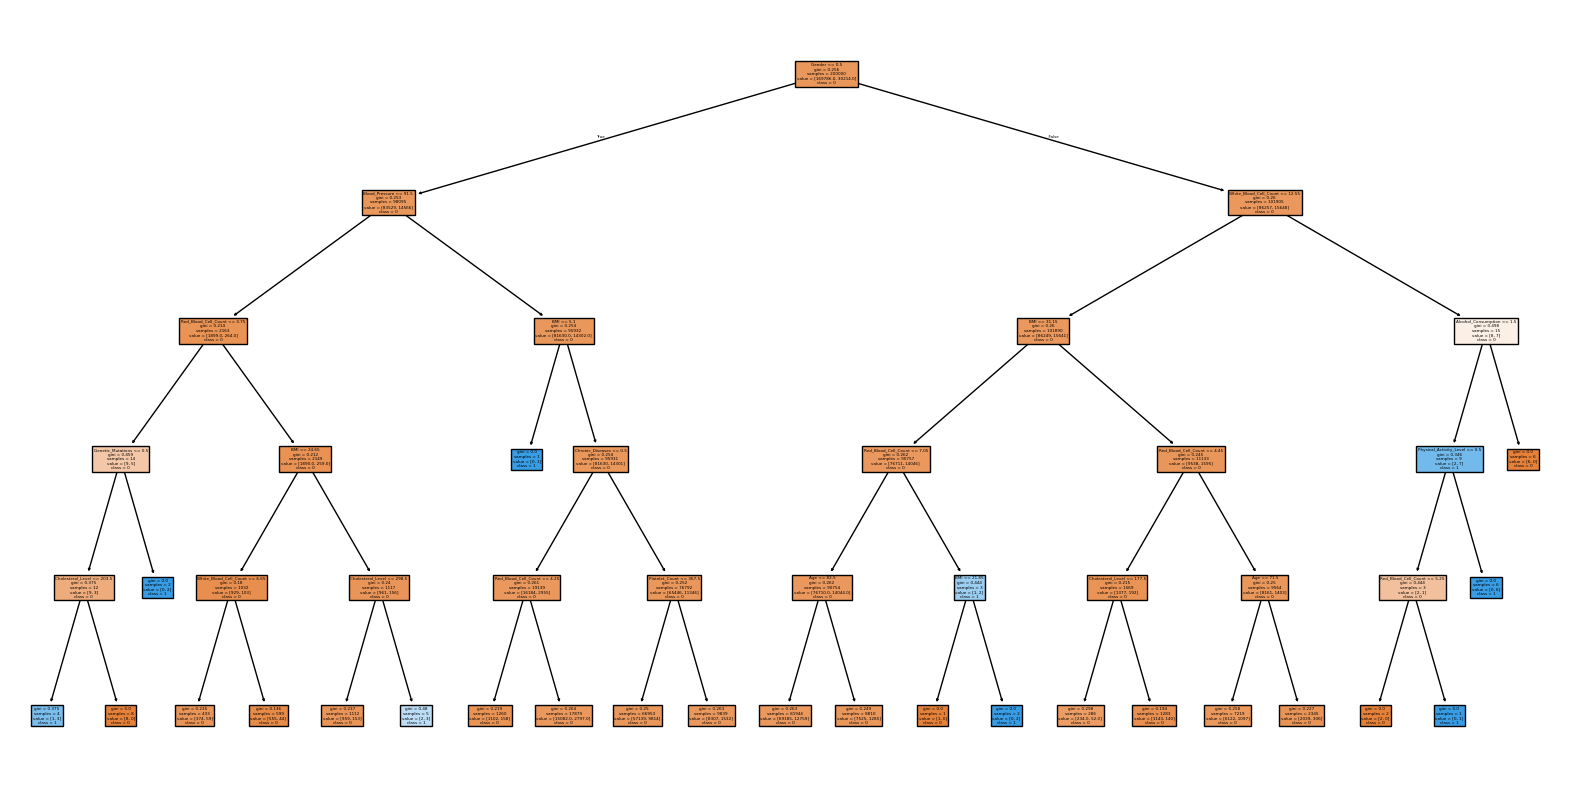

In [82]:
# prompt: show the train tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_classifier2 is your trained Decision Tree model and X_train has the feature names
plt.figure(figsize=(20,10))
plot_tree(dt_classifier2, filled=True, feature_names=X_train.columns, class_names=['0','1'])
plt.show()


# วัดผลด้วย test data

In [83]:
X_test = test_data.drop('Appendix_Cancer_Prediction', axis=1)
y_actual = test_data['Appendix_Cancer_Prediction']

In [84]:
# Predict using the trained model
y_pred = dt_classifier2.predict(X_test)

In [85]:
# Evaluate the model's accuracy on the test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_actual, y_pred) # y_actual กับ y_pred ห้ามสลับกัน
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.84875


ตอนไปใช้จริง กับขอมูลที่ไม่เคยเห็นเลย มันจะทายถูกได้ 84.875 %

# Quiz 12 หาต้นไม้ตัดสินที่มีค่า Accuracy มากกว่า 84.887%

In [99]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier = DecisionTreeClassifier(max_depth=4 , criterion='entropy')
# fit
dt_classifier.fit(X_train, y_train)
# train & # evaluation (cross -  validation)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [100]:
# Print the cross-validation
print("Cross-validation scores :", cv_scores)
print("Mean accuracy :", cv_scores.mean())
print("Standard deviation :", cv_scores.std())

Cross-validation scores : [0.84915 0.84865 0.8491  0.84885 0.84905 0.8506  0.84955 0.8496  0.8454
 0.84935]
Mean accuracy : 0.84893
Standard deviation : 0.0012820296408429818
